In [1]:
# 농어 데이터
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
# 훈련세트와 테스트세트 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

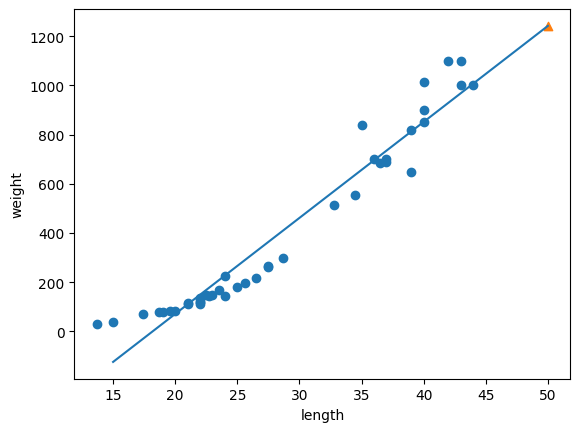

In [4]:
import matplotlib.pyplot as plt

# 훈련세트 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.83860323, marker="^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 실제 훈련데이터를 보면 직선(1차방정식)보다는 곡선(2차방정식)에 가깝다.
- 2차 방정식의 그래프를 그리기 위해 길이를 제곱한 항이 훈련세트에 추가 되어야 한다.

In [5]:
# 훈련세트와 테스트세트 각각 길이를 제곱한 배열 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [8]:
lr = LinearRegression()

# 모델 훈련
lr.fit(train_poly, train_target)

# 50cm 농어 무게 예측
lr.predict([[50 ** 2, 50]])

array([1573.98423528])

In [9]:
## 계수와 절편

print(f"계수: {lr.coef_}, y절편: {lr.intercept_}")

계수: [  1.01433211 -21.55792498], y절편: 116.05021078278247


모델이 학습한 2차 방정식
- $y = 1.01433211x^2 -21.55792498x + 116.05021078278247$

In [ ]:
x = np.arange(15, 50, 0.1)
y = (lr.coef_[0] * (x ** 2)) + (lr.coef_[1] * x) + lr.intercept_

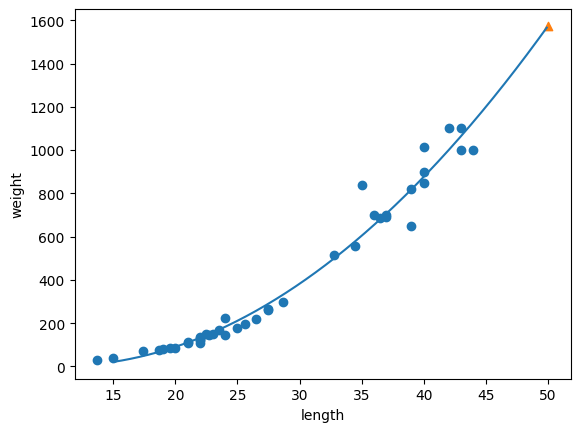

In [13]:
plt.scatter(train_input, train_target)
plt.plot(x, y)
plt.scatter(50, 1573.98423528, marker="^") # 50cm 농어 데이터
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### $R^2$ 점수
- 선형회귀와 점수를 비교하였을 때 모든 점수가 크게 향상되었다.
- 하지만, 훈련세트보다 테스트세트 점수가 더 높은 것을 보아 과소적합이 남아 있는 것을 확인 할 수 있다.

In [15]:
print(lr.score(train_poly, train_target)) # 훈련 세트
print(lr.score(test_poly, test_target)) # 테스트 세트

0.9706807451768623
0.9775935108325121
